## Importing libraries :-

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading the data :-

In [2]:
raw_data=pd.read_csv("2.01. Admittance.csv")
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


## Creating dummy variables for "Admitted"

In [4]:
data=raw_data.copy()
data["Admitted"]=data["Admitted"].map({"Yes":1,"No":0})

In [5]:
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


## Declaring variables :-

In [7]:
y=data["Admitted"]
x1=data["SAT"]


## The scatter plot :-

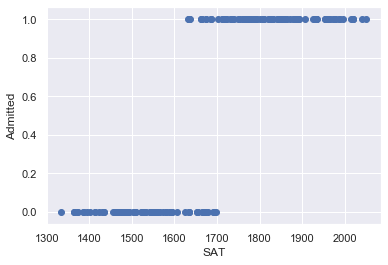

In [8]:
plt.scatter(x1,y)
plt.xlabel("SAT")
plt.ylabel("Admitted")
plt.show()

## The Regression itself :-

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


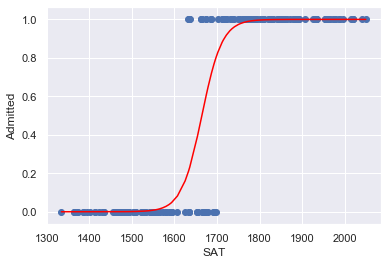

In [10]:
def convert(x,b0,b1):
    return (np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1))))

x=sm.add_constant(x1)
reg_log=sm.Logit(y,x)
results=reg_log.fit()
f_sorted=np.sort(convert(x1,results.params[0],results.params[1]))
x_sorted=np.sort(np.array(x1))
plt.scatter(x1,y)
plt.xlabel("SAT")
plt.ylabel("Admitted")
plt.plot(x_sorted,f_sorted,color="red")
plt.show()

## Summary :-

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Apr 2020   Pseudo R-squ.:                  0.7992
Time:                        19:58:33   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""